In [26]:
import uproot
import awkward as ak
import numpy as np
import hist
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import mplhep

In [17]:
cms_opendata_file = "root://eospublic.cern.ch//eos/opendata/cms/mc/RunIISummer20UL16NanoAODv9/DYJetsToLL_M-50_TuneCP5_13TeV-madgraphMLM-pythia8/NANOAODSIM/106X_mcRun2_asymptotic_v17-v1/40000/14B6A8AE-C9FE-D744-80A4-DDE5D008C1CD.root"
tree = uproot.open(f"{cms_opendata_file}:Events")

events = tree.arrays(entry_stop=10000)

# Histograms with numpy

In [18]:
counts, bins = np.histogram(ak.flatten(events.Jet_pt, axis=1).to_numpy(), 
             bins=50, 
             range=(0, 200))
counts, bins

(array([   0,    0,    0, 3637, 8295, 4031, 2741, 2032, 1775, 1772, 1671,
        1675, 1533, 1061,  890,  580,  352,  247,  207,  135,  116,   97,
          76,   61,   44,   29,   31,   23,   34,   12,   16,   22,   14,
          16,   10,    9,    9,   12,    2,    5,    3,    2,    5,    4,
           4,    2,    5,    3,    4,    2]),
 array([  0.,   4.,   8.,  12.,  16.,  20.,  24.,  28.,  32.,  36.,  40.,
         44.,  48.,  52.,  56.,  60.,  64.,  68.,  72.,  76.,  80.,  84.,
         88.,  92.,  96., 100., 104., 108., 112., 116., 120., 124., 128.,
        132., 136., 140., 144., 148., 152., 156., 160., 164., 168., 172.,
        176., 180., 184., 188., 192., 196., 200.], dtype=float32))

In [21]:
counts, xbins, ybins = np.histogram2d(ak.flatten(events.Jet_pt, axis=1).to_numpy(), 
                   ak.flatten(events.Jet_eta, axis=1).to_numpy(),
             bins=(50,50), 
             range=((0, 200), (-3,3)))
counts, xbins, ybins

(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 array([  0.,   4.,   8.,  12.,  16.,  20.,  24.,  28.,  32.,  36.,  40.,
         44.,  48.,  52.,  56.,  60.,  64.,  68.,  72.,  76.,  80.,  84.,
         88.,  92.,  96., 100., 104., 108., 112., 116., 120., 124., 128.,
        132., 136., 140., 144., 148., 152., 156., 160., 164., 168., 172.,
        176., 180., 184., 188., 192., 196., 200.]),
 array([-3.  , -2.88, -2.76, -2.64, -2.52, -2.4 , -2.28, -2.16, -2.04,
        -1.92, -1.8 , -1.68, -1.56, -1.44, -1.32, -1.2 , -1.08, -0.96,
        -0.84, -0.72, -0.6 , -0.48, -0.36, -0.24, -0.12,  0.  ,  0.12,
         0.24,  0.36,  0.48,  0.6 ,  0.72,  0.84,  0.96,  1.08,  1.2 ,
         1.32,  1.44,  1.56,  1.68,  1.8 ,  1.92,  2.04,  2.16,  2.28,
         2.4 ,  2.52,  2.64,  2.76,  2.88,  3.  

# Histogram with matplotlib

(array([5627., 3777., 2686., 1990., 1525., 1312., 1088., 1016.,  863.,
         852.,  785.,  737.,  766.,  766.,  693.,  737.,  695.,  707.,
         727.,  701.,  632.,  603.,  487.,  413.,  413.,  365.,  309.,
         252.,  199.,  152.,  156.,  113.,   98.,   98.,   85.,   83.,
          60.,   54.,   57.,   39.,   51.,   46.,   33.,   46.,   21.,
          26.,   29.,   20.,   20.,   18.]),
 array([ 15.        ,  16.70000076,  18.39999962,  20.10000038,
         21.79999924,  23.5       ,  25.20000076,  26.89999962,
         28.60000038,  30.29999924,  32.        ,  33.70000076,
         35.40000153,  37.09999847,  38.79999924,  40.5       ,
         42.20000076,  43.90000153,  45.59999847,  47.29999924,
         49.        ,  50.70000076,  52.40000153,  54.09999847,
         55.79999924,  57.5       ,  59.20000076,  60.90000153,
         62.59999847,  64.30000305,  66.        ,  67.69999695,
         69.40000153,  71.09999847,  72.80000305,  74.5       ,
         76.19999695,  7

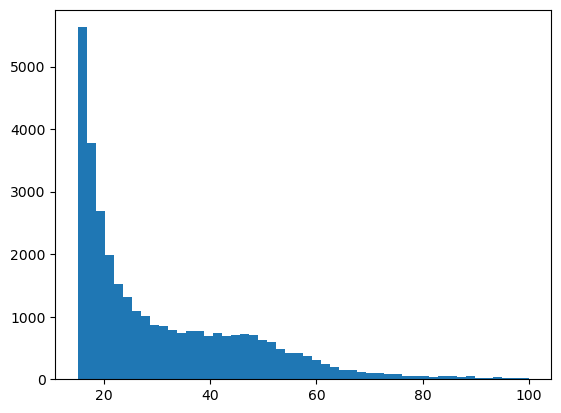

In [23]:
plt.hist(ak.flatten(events.Jet_pt, axis=1).to_numpy(), 
             bins=50, 
             range=(15, 100))

Text(0, 0.5, 'Jets $\\phi$')

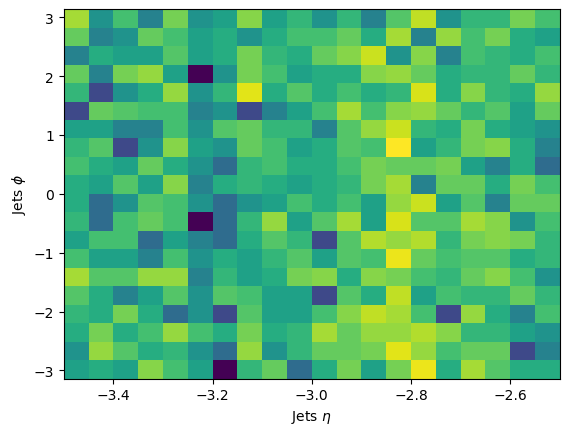

In [34]:
plt.hist2d(
        ak.flatten(events.Jet_eta, axis=1).to_numpy(),
        ak.flatten(events.Jet_phi, axis=1).to_numpy(), 
        bins=(20,20), 
        range=((-3, -3), (-np.pi,np.pi)), 
        norm=LogNorm()
);
plt.xlabel("Jets $\eta$")
plt.ylabel("Jets $\phi$")

# Histograms with boost.hist

https://hist.readthedocs.io/en/latest/

Hist is a powerful Histogramming tool for analysis based on boost-histogram (the Python binding of the Histogram library in Boost).

In [35]:
import hist
from hist import Hist

In [40]:
h = Hist(hist.axis.Regular(bins=10, start=0, stop=100, name="MET"))
h

Hist(Regular(10, 0, 100, name='MET'), storage=Double())

In [41]:
h.fill(events.MET_pt)

Hist(Regular(10, 0, 100, name='MET'), storage=Double()) # Sum: 9969.0 (10000.0 with flow)

Now multidim

In [62]:
h = Hist(
    hist.axis.Regular(bins=10, start=-3, stop=3, name="eta"),
    hist.axis.Regular(bins=10, start=-3.14, stop=3.14, name="phi")
)
h.fill(ak.flatten(events.Jet_eta), ak.flatten(events.Jet_phi))
h

Hist(
  Regular(10, -3, 3, name='eta'),
  Regular(10, -3.14, 3.14, name='phi'),
  storage=Double()) # Sum: 25986.0 (33336.0 with flow)

There is also a syntax for fast building of histograms

In [68]:
hist3d =( 
    Hist.new.Regular(10, 0, 100, name="x")
        .Regular(10, 0.0, 10.0, name="y")
        .Variable([1, 2, 3, 4, 5, 5.5, 6], name="z")
        .Weight()
)
hist3d

Hist(
  Regular(10, 0, 100, name='x'),
  Regular(10, 0, 10, name='y'),
  Variable([1, 2, 3, 4, 5, 5.5, 6], name='z'),
  storage=Weight()) # Sum: WeightedSum(value=0, variance=0)

## Defining Axes

Hists can be constructed with an arbitrary number of axes (be careful with your RAM!).

There are many types of axes, numerical and categorical.

In [76]:
# numerical axes
axis0 = hist.axis.Regular(10, -5, 5, overflow=False, underflow=False, name="A", label="a")
axis1 = hist.axis.Boolean(name="B")
axis2 = hist.axis.Variable(range(10), name="C")
axis3 = hist.axis.Integer(-5, 5, overflow=False, underflow=False, name="D")

# Categorical axes
axis4 = hist.axis.IntCategory(range(10), name="E")
axis5 = hist.axis.StrCategory(["T", "F"], name="F")

Axes properties can be accessed with

In [70]:
hist3d.axes

(Regular(10, 0, 100, name='x'),
 Regular(10, 0, 10, name='y'),
 Variable([1, 2, 3, 4, 5, 5.5, 6], name='z'))

In [72]:
axis0.centers

array([-4.5, -3.5, -2.5, -1.5, -0.5,  0.5,  1.5,  2.5,  3.5,  4.5])

In [73]:
axis0.edges

array([-5., -4., -3., -2., -1.,  0.,  1.,  2.,  3.,  4.,  5.])

In [77]:
axis0.label, axis0.name

('a', 'A')

## Storage and filling

Histograms can store plain interger/double or store weighted entries. In the latter case there are methods defined to compute the variance of the histogram content (sumw2)

In [84]:
h = (
   Hist.new.Reg(10, 0, 1, name="x")
    .Reg(10, 0, 1, name="y")
    .Double()
    .fill(x=[0.5, 0.5], y=[0.2, 0.6])
)
h.values()

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [89]:
h = (
   Hist.new.Reg(10, 0, 1, name="x")
    .Reg(10, 0, 1, name="y")
    .Weight()
    .fill(x=[0.5, 0.5], y=[0.2, 0.6], weight=[0.1, 3])
)
print(h.values())
print(h.variances())

[[0.  0.  0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.1 0.  0.  0.  3.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.  0.  0.  0. ]]
[[0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.01 0.   0.   0.   9.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]]


## Slicing and indexing

More advanced examples: https://hist.readthedocs.io/en/latest/user-guide/notebooks/Histogram.html

Histograms can be easily sliced

In [136]:
hist3d =( 
    Hist.new.Regular(30, 15, 150, name="pt")
        .Regular(20, -3, 3, name="eta")
        .Regular(20, 0, 2*np.pi, circular=True, name="phi")
        .Weight()
)

In [137]:
hist3d.fill(
    ak.flatten(events.Jet_pt), 
    ak.flatten(events.Jet_eta), 
    ak.flatten(events.Jet_phi), 
    weight= ak.flatten(events.genWeight * ak.ones_like(events.Jet_pt))
)

Hist(
  Regular(30, 15, 150, name='pt'),
  Regular(20, -3, 3, name='eta'),
  Regular(20, 0, 6.28319, circular=True, name='phi'),
  storage=Weight()) # Sum: WeightedSum(value=25919, variance=25919) (WeightedSum(value=33336, variance=33336) with flow)

Indexing with bin position

In [138]:
hist3d[ 0:4,  10:20, :]

Hist(
  Regular(4, 15, 33, name='pt'),
  Regular(10, 0, 3, name='eta'),
  Regular(20, 0, 6.28319, circular=True, name='phi'),
  storage=Weight()) # Sum: WeightedSum(value=7510, variance=7510) (WeightedSum(value=33336, variance=33336) with flow)

Or indexing with axes value ranges

In [139]:
hist3d[ 15j:20j,  -1.5j:1.5j, sum]

Hist(
  Regular(1, 15, 19.5, name='pt'),
  Regular(10, -1.5, 1.5, name='eta'),
  storage=Weight()) # Sum: WeightedSum(value=3388, variance=3388) (WeightedSum(value=33336, variance=33336) with flow)

In this last example the bins on the last axes (phi) have been accumulated using the `sum` function.

### Rebinning

In [140]:
hist3d[ :, sum, sum]

Hist(Regular(30, 15, 150, name='pt'), storage=Weight()) # Sum: WeightedSum(value=33260, variance=33260) (WeightedSum(value=33336, variance=33336) with flow)

In [141]:
hist3d[ ::hist.rebin(3), sum, sum]

Hist(Regular(10, 15, 150, name='pt'), storage=Weight()) # Sum: WeightedSum(value=33260, variance=33260) (WeightedSum(value=33336, variance=33336) with flow)

### Projection

In [142]:
hist3d.project("pt")

Hist(Regular(30, 15, 150, name='pt'), storage=Weight()) # Sum: WeightedSum(value=33260, variance=33260) (WeightedSum(value=33336, variance=33336) with flow)

In [143]:
hist3d.project("eta", "phi")

Hist(
  Regular(20, -3, 3, name='eta'),
  Regular(20, 0, 6.28319, circular=True, name='phi'),
  storage=Weight()) # Sum: WeightedSum(value=25994, variance=25994) (WeightedSum(value=33336, variance=33336) with flow)

### Slicing with a dictionary

In [151]:
hist3d = ( 
    Hist.new.Regular(30, 15, 150, name="pt")
        .Regular(20, -3, 3, name="eta")
        .Regular(20, 0, 2*np.pi, circular=True, name="phi")
        .StrCategory(["1muon", "0muon"], name="muon_cat")
        .Weight()
)

mask_muon = ak.num(events.Muon_pt)>0

hist3d.fill(
    ak.flatten(events[mask_muon].Jet_pt), 
    ak.flatten(events[mask_muon].Jet_eta), 
    ak.flatten(events[mask_muon].Jet_phi), 
    muon_cat = "1muon",
    weight= ak.flatten(events[mask_muon].genWeight * ak.ones_like(events[mask_muon].Jet_pt))
)

hist3d.fill(
    ak.flatten(events[~mask_muon].Jet_pt), 
    ak.flatten(events[~mask_muon].Jet_eta), 
    ak.flatten(events[~mask_muon].Jet_phi), 
    muon_cat = "0muon",
    weight= ak.flatten(events[~mask_muon].genWeight * ak.ones_like(events[~mask_muon].Jet_pt))
)

Hist(
  Regular(30, 15, 150, name='pt'),
  Regular(20, -3, 3, name='eta'),
  Regular(20, 0, 6.28319, circular=True, name='phi'),
  StrCategory(['1muon', '0muon'], name='muon_cat'),
  storage=Weight()) # Sum: WeightedSum(value=25919, variance=25919) (WeightedSum(value=33336, variance=33336) with flow)

In [154]:
hist3d[{"muon_cat": "1muon", "pt": slice(0, 2)}]

Hist(
  Regular(2, 15, 24, name='pt'),
  Regular(20, -3, 3, name='eta'),
  Regular(20, 0, 6.28319, circular=True, name='phi'),
  storage=Weight()) # Sum: WeightedSum(value=4475, variance=4475) (WeightedSum(value=13883, variance=13883) with flow)

The `slice` function is used to specify a slicing command, with the same syntax used for direct slicing

In [155]:
hist3d[{"muon_cat": "1muon", "eta": slice(-2j, 2j, sum)}]

Hist(
  Regular(30, 15, 150, name='pt'),
  Regular(20, 0, 6.28319, circular=True, name='phi'),
  storage=Weight()) # Sum: WeightedSum(value=7996, variance=7996) (WeightedSum(value=8023, variance=8023) with flow)

## Histograms stack
Stacks are a convenient way of grouping histograms with names. 

In [145]:
ax = hist.axis.Regular(25, -5, 5, flow=False, name="x")
cax = hist.axis.StrCategory(["signal", "upper", "lower"], name="c")
full_hist = Hist(ax, cax)

full_hist.fill(x=np.random.normal(size=600), c="signal")
full_hist.fill(x=2 * np.random.normal(size=500) + 2, c="upper")
full_hist.fill(x=2 * np.random.normal(size=500) - 2, c="lower")

# Create a stack over the categorical axes
s = full_hist.stack("c")
s

Stack<('signal', 'upper', 'lower') of Hist(Regular(25, -5, 5, underflow=False, overflow=False, name='x'), storage=Double()) # Sum: 600.0>

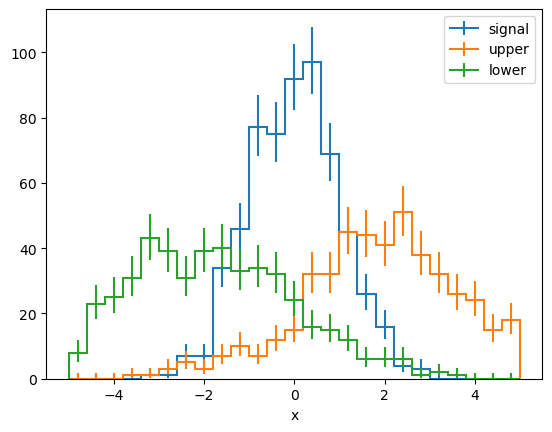

In [147]:
s.plot()
plt.legend()

# Plotting with mplhep

https://mplhep.readthedocs.io/en/latest/
mlhep is matplotlib wrapper for easy plotting required in high energy physics (HEP). Primarily “prebinned” 1D & 2D histograms and matplotlib style-sheets carrying recommended plotting styles of large LHC experiments - ATLAS, CMS & LHCb. 

In [157]:
import mplhep as hep
plt.style.use(hep.style.CMS)

Text(1, 0, 'Leading Muon $p_T$')

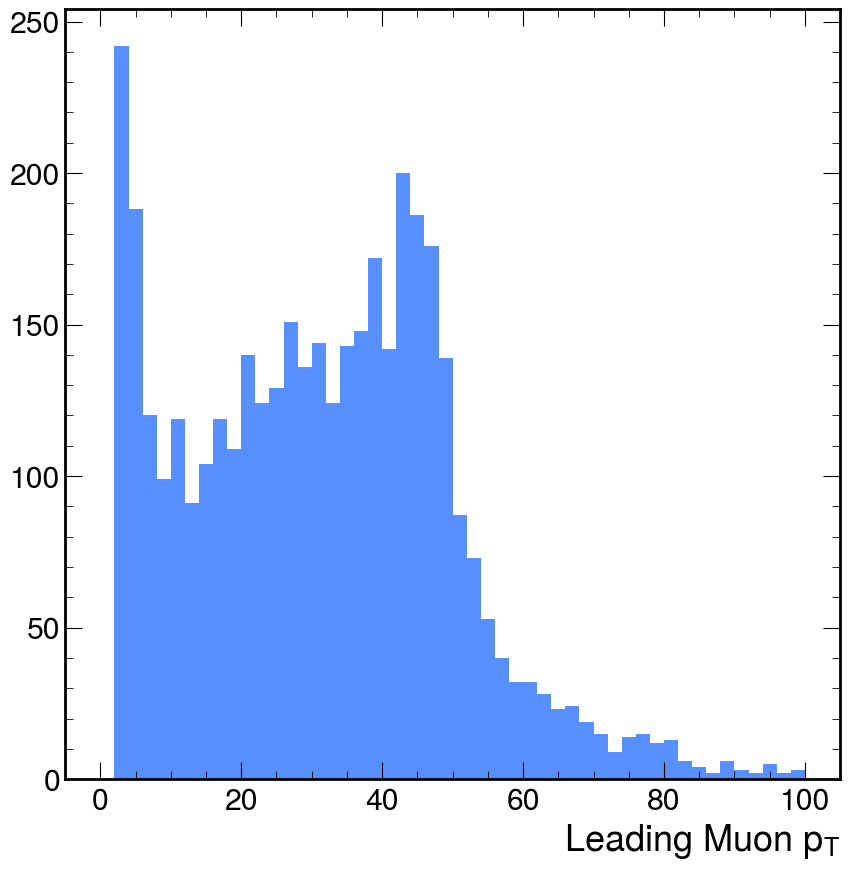

In [164]:
plt.hist(events[mask_muon].Muon_pt[:, 0], bins=50, range=(0, 100));
plt.xlabel("Leading Muon $p_T$")

(exptext: Custom Text(0.0, 1, 'CMS'),
 expsuffix: Custom Text(0.0, 1.005, 'Open Data'),
 supptext: Custom Text(1.012, 1, ''))

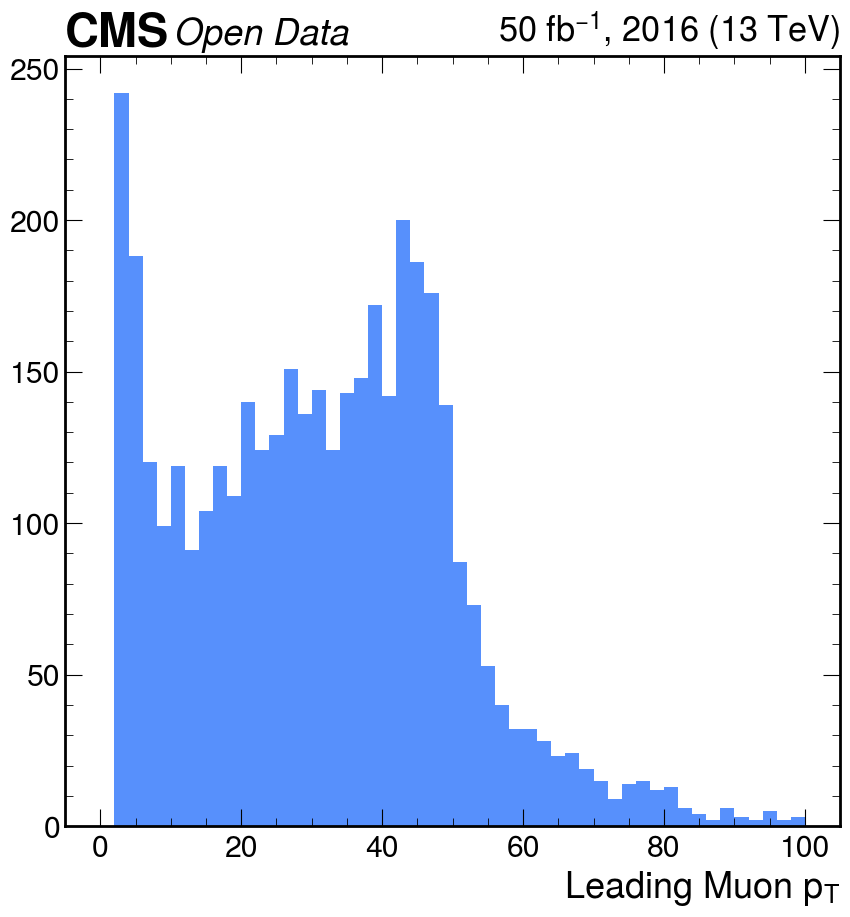

In [171]:
plt.hist(events[mask_muon].Muon_pt[:, 0], bins=50, range=(0, 100));
plt.xlabel("Leading Muon $p_T$")

# loc setup the location of the label
hep.cms.label("Open Data", data=True, lumi=50, year=2016, loc=0)

# To setup only the text
#hep.<experiment>.text(<text>)

The hist library is well integrated with matplotlib. 


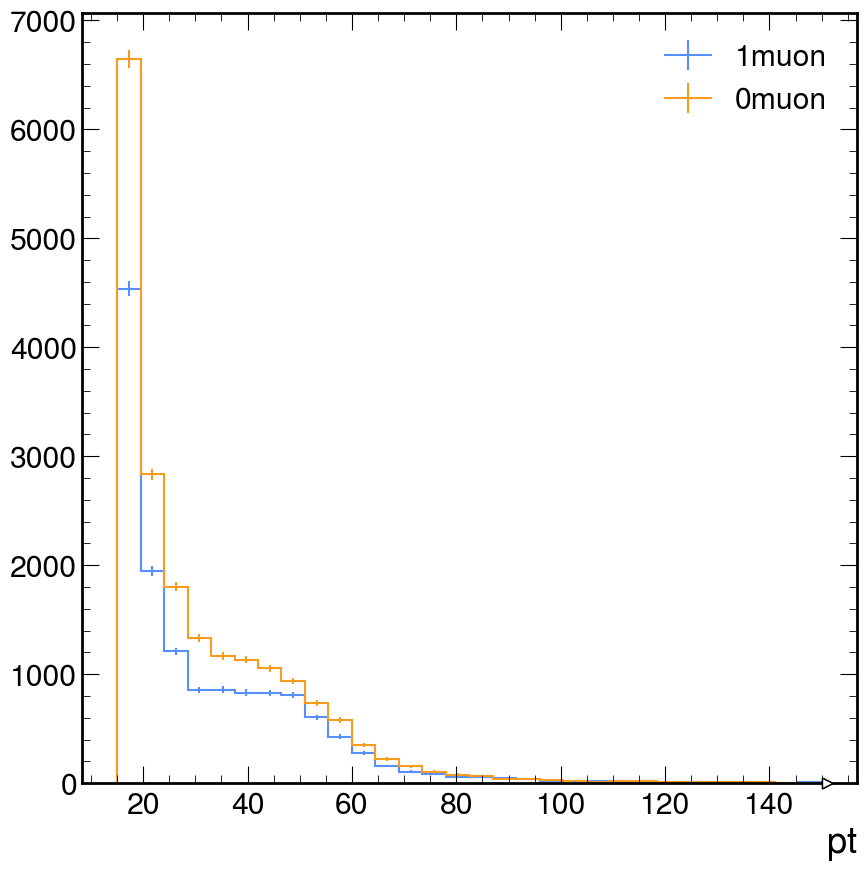

In [178]:
hist3d[{"muon_cat": "1muon"}].project("pt").plot(label="1muon");
hist3d[{"muon_cat": "0muon"}].project("pt").plot(label="0muon");
plt.legend()

We can create a stack with the two categories and plot it in the "standard" way

(exptext: Custom Text(0.001, 1, 'CMS'),
 expsuffix: Custom Text(0.001, 1.005, 'Open Data'),
 supptext: Custom Text(1.012, 1, ''))

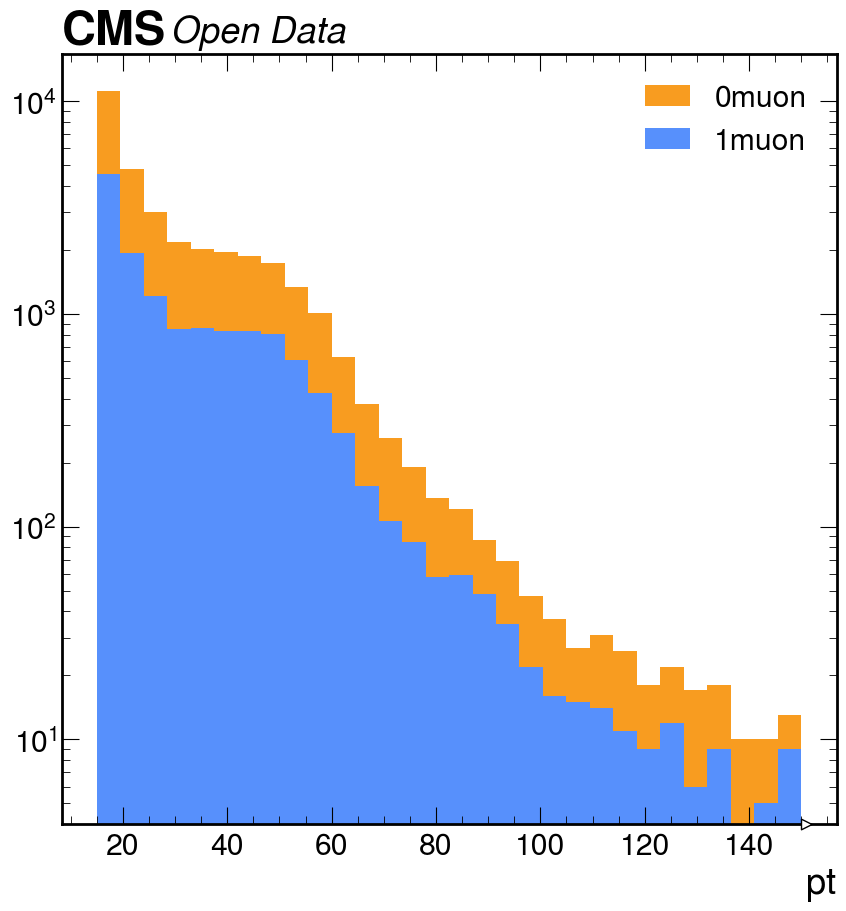

In [187]:
stack = hist3d.stack("muon_cat")
stack.project("pt").plot(stack=True, histtype="fill")
plt.yscale("log")
plt.legend()
hep.cms.text("Open Data")

## 2D histogram plotting

2D histograms can be nicely plotting directly from Hist

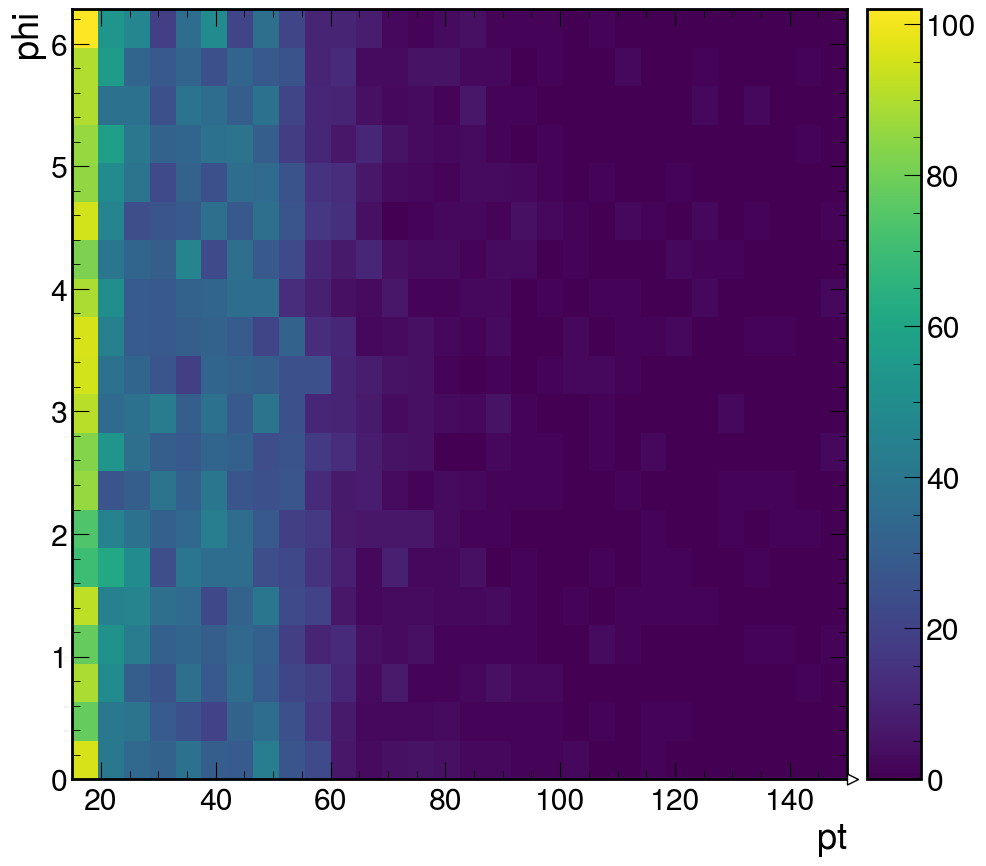

In [173]:
hist3d[{"muon_cat": "1muon", "eta": slice(-2j, 2j, sum)}].plot();